In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import BaggingRegressor, VotingRegressor, GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

In [2]:
apt = pd.read_csv('./apartment_price.csv')

train, test = train_test_split(apt, test_size=0.2, random_state = 7916, stratify = apt['gu'])

target = test['price'].copy()
test = test.drop('price', axis = 1)

all_data = pd.concat([train, test], axis = 0, ignore_index = True)

drop_features = ['apt_name', 'gu', 'dong', 'transaction_year_month', 'transaction_date', 'year_of_completion', 'commuting_vehicle_sum', 
                 'day_care_num', 'permission_year', 'park_area', 'one_park_area', 'citypark_area', 'one_citypark_area']
all_data = all_data.drop(drop_features, axis = 1)

X_train = all_data[~pd.isnull(all_data['price'])]
X_test = all_data[pd.isnull(all_data['price'])]

y_train = X_train['price']
X_train = X_train.drop(['price'], axis = 1)

X_test = X_test.drop(['price'], axis = 1)

log_y = np.log(y_train)

# Final model Test

- train 데이터로 fitting 해본 결과 가장 성능이 좋다고 판단되는 모델인 Gradient Boosting 모델을 최종 모델로 선택
- 최종 Gradient Boosting 모델 hyper parameter ('learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.5)

In [7]:
log_target = np.log(target)

In [5]:
gbrt = GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=1500, subsample=0.5, random_state=7916)

In [6]:
gbrt.fit(X_train, log_y)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=1500,
                          random_state=7916, subsample=0.5)

In [10]:
y_pred = gbrt.predict(X_test)

In [14]:
mean_squared_error(log_target, y_pred)

0.06930499418814444

-  최종 mse 값 : 0.06930499418814444

In [53]:
data = np.c_[(log_target, y_pred)]

In [57]:
data = pd.DataFrame(data, columns=['log_target', 'y_pred'])

In [82]:
data

,log_target,y_pred
0,11.138959,11.345376
1,11.482466,11.436821
2,11.678440,11.964233
3,11.407565,11.612626
4,11.348051,10.931428
...,...,...
64336,10.976782,11.082403
64337,10.993732,11.189953
64338,10.896739,11.097455
64339,10.922335,11.235841


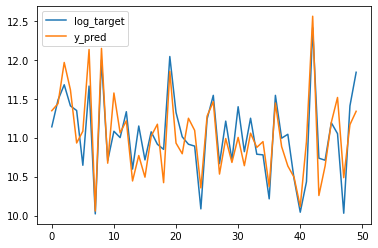

In [80]:
# 최종 종속 변수와 예측값의 차이 시각화
plt.plot(data.iloc[:50, 0], label = 'log_target')
plt.plot(data.iloc[:50, 1], label = 'y_pred')
plt.legend()
plt.show()

## (추가) Best 모델은 아니지만 성능이 괜찮았던 모델 Test

### (1) 랜덤포레스트 모델 
- hyper parameter {'max_depth': 20, 'max_features': 10, 'n_estimators': 220}

In [15]:
rnd_forest = RandomForestRegressor(n_estimators=220, max_depth=20, max_features=10, random_state=7916)

In [16]:
rnd_forest.fit(X_train, log_y)

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=220,
                      random_state=7916)

In [18]:
y_pred = rnd_forest.predict(X_test)

In [21]:
mean_squared_error(log_target, y_pred)

0.07015279714123512

### (2) 선형 회귀 모델

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_train, log_y)

LinearRegression()

In [17]:
y_pred = lin_reg.predict(X_test)

In [18]:
mean_squared_error(log_target, y_pred)

0.17907320704468227

### (3) 다항 회귀 모델 (정규방정식 이용)

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_train.shape, X_train_poly.shape

lin_reg_poly = LinearRegression()

In [28]:
lin_reg_poly.fit(X_train_poly, log_y)

LinearRegression()

In [29]:
X_test_poly = poly_features.fit_transform(X_test)

In [31]:
y_pred = lin_reg_poly.predict(X_test_poly)

In [32]:
mean_squared_error(log_target, y_pred)

0.13370975594612017

### (4) ridge 모델 
- alpha = 0.1 

In [23]:
ridge = Ridge(alpha=0.1, random_state=7916)

In [24]:
ridge.fit(X_train, log_y)

Ridge(alpha=0.1, random_state=7916)

In [25]:
y_pred = ridge.predict(X_test)

In [26]:
mean_squared_error(log_target, y_pred)

0.17907321527937733

### (5)  lasso 모델 
- alpha = 0.0001

In [33]:
lasso = Lasso(alpha=0.0001, random_state=7916)

In [34]:
lasso.fit(X_train, log_y)

Lasso(alpha=0.0001, random_state=7916)

In [35]:
y_pred = lasso.predict(X_test)

In [36]:
mean_squared_error(log_target, y_pred)

0.179079231813746

### (6) ElasticNet 모델 
- alpha = 0.001

In [37]:
elastic = ElasticNet(alpha=0.001, random_state=7916)

In [38]:
elastic.fit(X_train, log_y)

ElasticNet(alpha=0.001, random_state=7916)

In [39]:
y_pred = elastic.predict(X_test)

In [40]:
mean_squared_error(log_target, y_pred)

0.17922363511430414

### (7) 결정트리 모델 
- hyper parameter {max_depth: 15, max_features: 10}

In [41]:
tree_reg = DecisionTreeRegressor(random_state=7916, max_depth=15, max_features=10)

In [42]:
tree_reg.fit(X_train, log_y)

DecisionTreeRegressor(max_depth=15, max_features=10, random_state=7916)

In [43]:
y_pred = tree_reg.predict(X_test)

In [44]:
mean_squared_error(log_target, y_pred)

0.0808250427113568

### (8) Votting 모델
- hyper parameter (by random forest) {max_depth=20, max_features=10, n_estimators=220}

In [ ]:
lin_reg = LinearRegression()
ridge = Ridge(alpha=0.1, random_state=7916)
rnd_forest = RandomForestRegressor(max_depth=20, max_features=10, n_estimators=220, random_state=7916)
svm = SVR()

voting_reg = VotingRegressor(estimators = [('lin', lin_reg), ('rid', ridge), ('rnd', rnd_forest), ('svmr', svm)], n_jobs=-1)

In [ ]:
voting_reg.fit(X_train, log_y)

In [ ]:
y_pred = voting_reg.predict(X_test)

In [ ]:
mean_squared_error(log_target, y_pred)

### (9) Bagging 모델
- hyper parameter (by random forest) {max_depth=20, max_features=10, n_estimators=220}

In [ ]:
rnd_forest = RandomForestRegressor(max_depth=20, max_features=10, n_estimators=220, random_state=7916)

bag_reg = BaggingRegressor(rnd_forest, n_jobs=-1, random_state=7916)

In [ ]:
bag_reg.fit(X_train, log_y)

In [ ]:
y_pred = bag_reg.predict(X_test)

In [ ]:
mean_squared_error(log_target, y_pred)

### (10) SVR

In [3]:
lin_svr = LinearSVR()

In [4]:
lin_svr.fit(X_train, log_y)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [5]:
y_pred = lin_svr.predict(X_test)

In [8]:
mean_squared_error(log_target, y_pred)

0.4841539298846815